In [129]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# import data

In [130]:
raw_t0 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T0')
raw_t1 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T1')


In [131]:
# find participants that have T0 and T1 data 

pp_t0 = raw_t0.iloc[:, 0:3].drop('trial', axis = 1)
pp_t1 = raw_t1.iloc[:, 0:3].drop('trial', axis = 1)
pp_list = pd.merge(pp_t0, pp_t1, on='ppID')
pp_list = pp_list.drop(['time_x', 'time_y'], axis = 1)
print(pp_list)

#i = pp_list.loc[pp_list['ppID'] == 'BC_013'].index
#pp_list = pp_list.drop(i)

      ppID
0   BC_001
1   BC_002
2   BC_003
3   BC_005
4   BC_006
5   BC_007
6   BC_008
7   BC_009
8   BC_010
9   BC_011
10  BC_012
11  BC_013
12  BC_014
13  BC_015
14  BC_016
15  BC_017
16  BC_018
17  BC_019
18  BC_020
19  BC_021
20  BC_023
21  BC_026
22  BC_027
23  BC_029
24  BC_030
25  BC_031
26  BC_032
27  BC_033
28  BC_034
29  BC_035
30  BC_036
31  BC_037
32  BC_038
33  BC_039


In [132]:
# only retain the participants with both T0 and T1 data
raw_t0 = pd.merge(raw_t0, pp_list, on='ppID')
raw_t1 = pd.merge(raw_t1, pp_list, on='ppID')

assert len(raw_t0) == len(raw_t1)

raw = pd.concat([raw_t0, raw_t1], axis=0, ignore_index=True)
raw.head()

,ppID,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
0,BC_001,F_R_001,T0,3.941924,1.549288,2.113114,4.800227,0.516745,1.124735,0.444386,...,0.722385,0.700168,2.790703,0.714998,3.699238,4.930878,0.595202,0.152495,0.788974,-6.532576
1,BC_002,F_L_001,T0,3.782026,2.312841,4.261617,2.089827,0.656433,0.850923,0.584063,...,0.843851,0.613813,1.734763,1.336834,2.359757,3.388705,0.538835,0.415234,0.732965,-6.902768
2,BC_003,F_R_001,T0,2.643762,1.812328,1.806883,3.853107,0.374196,1.028051,0.409365,...,0.714821,0.723914,4.302396,0.997111,5.855908,7.630636,0.586588,0.135946,0.798394,-6.354556
3,BC_005,F_R_001,T0,4.337572,2.510588,3.918768,5.870719,0.873046,0.844859,0.487799,...,0.460027,0.327316,1.501664,1.275006,3.040890,3.877058,0.414457,0.351900,0.839281,-6.769533
4,BC_006,F_R_001,T0,2.589368,1.899844,2.053541,5.562778,0.887518,1.184081,0.468892,...,0.440678,0.383413,1.947852,1.175845,3.447380,4.392242,0.471576,0.284673,0.834612,-7.447521


### create datafram with index

In [133]:
df = raw.iloc[0:,1:]
df.index = raw.iloc[0:,0]
df.head()

,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
ppID,,,,,,,,,,,,,,,,,,,,,
BC_001,F_R_001,T0,3.941924,1.549288,2.113114,4.800227,0.516745,1.124735,0.444386,0.614117,...,0.722385,0.700168,2.790703,0.714998,3.699238,4.930878,0.595202,0.152495,0.788974,-6.532576
BC_002,F_L_001,T0,3.782026,2.312841,4.261617,2.089827,0.656433,0.850923,0.584063,0.890987,...,0.843851,0.613813,1.734763,1.336834,2.359757,3.388705,0.538835,0.415234,0.732965,-6.902768
BC_003,F_R_001,T0,2.643762,1.812328,1.806883,3.853107,0.374196,1.028051,0.409365,0.585909,...,0.714821,0.723914,4.302396,0.997111,5.855908,7.630636,0.586588,0.135946,0.798394,-6.354556
BC_005,F_R_001,T0,4.337572,2.510588,3.918768,5.870719,0.873046,0.844859,0.487799,0.850219,...,0.460027,0.327316,1.501664,1.275006,3.040890,3.877058,0.414457,0.351900,0.839281,-6.769533
BC_006,F_R_001,T0,2.589368,1.899844,2.053541,5.562778,0.887518,1.184081,0.468892,0.907920,...,0.440678,0.383413,1.947852,1.175845,3.447380,4.392242,0.471576,0.284673,0.834612,-7.447521


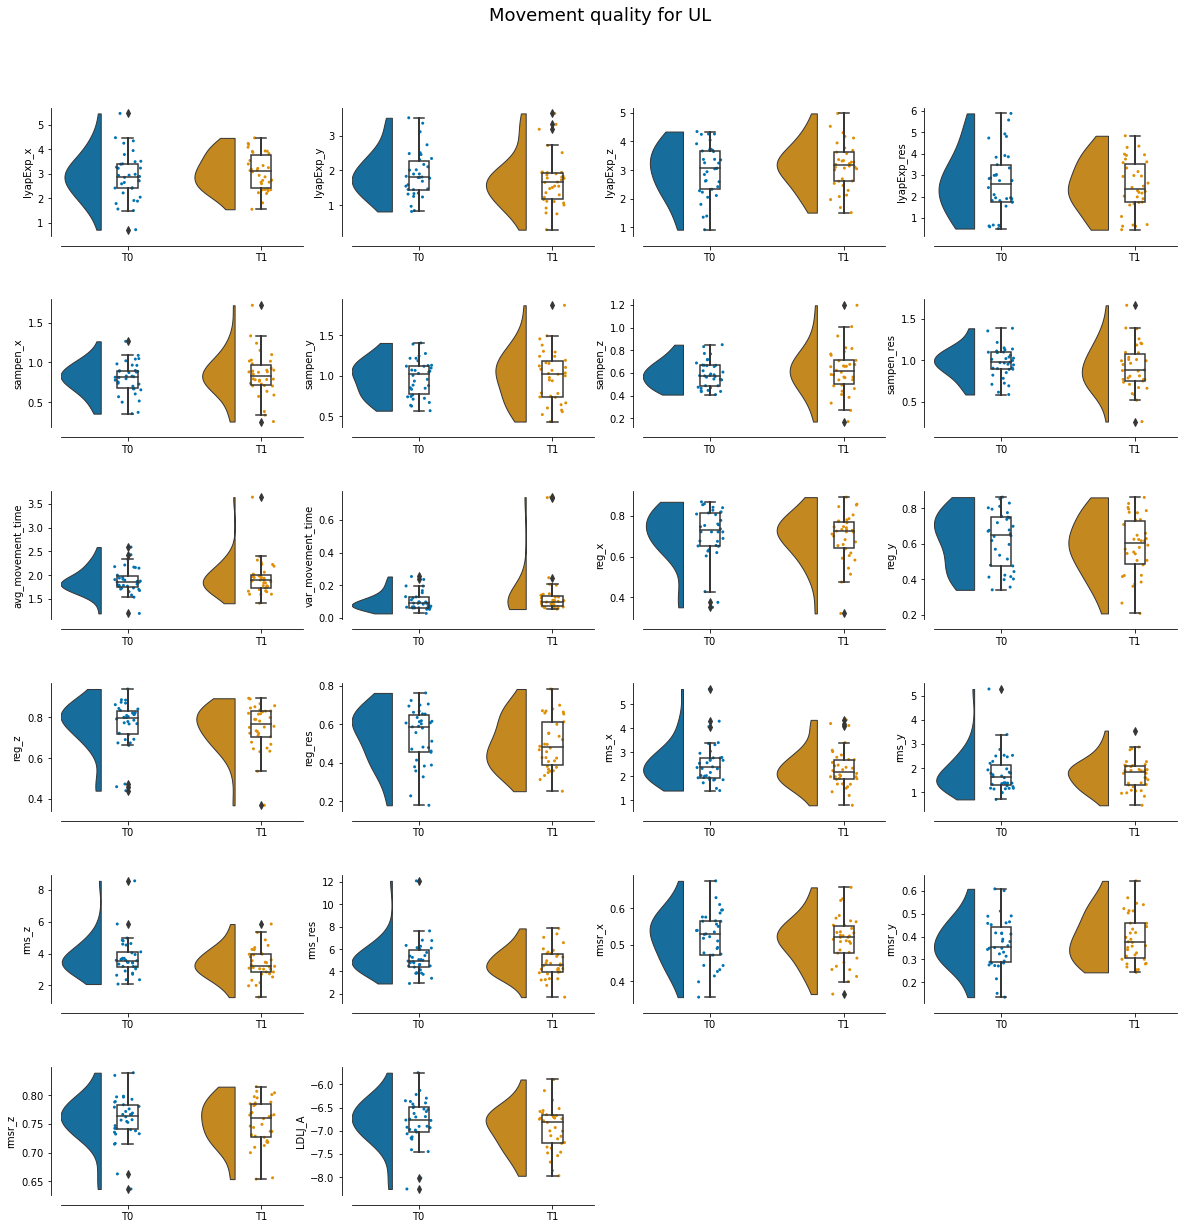

In [134]:
X = df.drop(['trial','time'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')
    
plt.savefig('MovementQuality.tiff')

# Statistical anlysis
### Pre-op vs Post-op on 20 participants as a first analysis method

In [135]:
# find outliers
df.loc[df['LDLJ_A'] == df['LDLJ_A'].min()]

,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
ppID,,,,,,,,,,,,,,,,,,,,,
BC_013,F_L_001,T0,5.454522,2.458477,3.24567,2.9921,1.264449,1.214769,0.669694,1.214644,...,0.473265,0.228578,1.412235,1.143535,2.088149,2.921384,0.51018,0.41311,0.754358,-8.251814


In [136]:
T0 = df.loc[df['time']=='T0']
T1 = df.loc[df['time']=='T1']
timepoints = ['T0', 'T1']

for var in df.columns:
    print('Analyzing {}'.format(var))
    if var == 'trial' or var == 'time':
        print(80* "_" + "\n" )
    else:
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
                           

Analyzing trial
________________________________________________________________________________

Analyzing time
________________________________________________________________________________

Analyzing lyapExp_x
225.0 0.2152
________________________________________________________________________________

Analyzing lyapExp_y
228.0 0.2348
________________________________________________________________________________

Analyzing lyapExp_z
276.0 0.7132
________________________________________________________________________________

Analyzing lyapExp_res
283.0 0.8042
________________________________________________________________________________

Analyzing sampen_x
240.0 0.3256
________________________________________________________________________________

Analyzing sampen_y
263.0 0.5553
________________________________________________________________________________

Analyzing sampen_z
260.0 0.5214
________________________________________________________________________________

A

In general, there appears to be no differences in movement quality before an after surgery on group level

# run the analysis again. But remove the participants that had perceived disability pre-operatively

In [137]:
raw_dash = pd.read_csv("C:\\Users\\u0117545\\KU Leuven\\An De Groef - DATA\\XsensTest\\QuickDASH\\UPLIFTBC-QuickDASH_DATA_2022-10-31_1406 (1).csv",
                   sep=';')

In [138]:
# only retain T0 of the dash scores 
idx = raw_dash['redcap_event_name'].str.contains('t0')
mask = np.where(idx)[0]
raw_dash = raw_dash.iloc[mask]
raw_dash

,record_id,redcap_event_name,quickdash_1,quickdash_2,quickdash_3,quickdash_4,quickdash_5,quickdash_6,quickdash_7,quickdash_8,quickdash_9,quickdash_10,quickdash_11
0,BC_001,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BC_002,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,BC_003,t0_baseline_presur_arm_1,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
7,BC_004,t0_baseline_presur_arm_1,4.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
8,BC_005,t0_baseline_presur_arm_1,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0
10,BC_006,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,BC_007,t0_baseline_presur_arm_1,5.0,4.0,4.0,4.0,1.0,4.0,2.0,3.0,3.0,3.0,3.0
14,BC_008,t0_baseline_presur_arm_1,3.0,2.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
16,BC_009,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,BC_010,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [139]:
# remove participants with more than 2 NaNs
# Remove rows with missing values
print("Before removing rows with missing data: {} rows".format(len(raw_dash)))
df_dash = raw_dash.dropna(thresh=raw_dash.shape[1]-1, axis=0)
print("After removing rows with missing data: {} rows".format(len(df_dash)))

som = df_dash.iloc[:,2:].sum(axis='columns')
col_n_counts = np.sum(df_dash.applymap(lambda x: 0 if pd.isnull(x) else 1), axis=1)-2
complete = col_n_counts.apply(lambda x:  x >= 10 )

total_score = ((som/col_n_counts)-1) * 25

print('Average score over all participants and timepoints = {}'.format(np.mean(total_score)))
print('Maximum and minumum scores are {} & {} respectively'.format(total_score.max(), total_score.min()))

Before removing rows with missing data: 33 rows
After removing rows with missing data: 28 rows
Average score over all participants and timepoints = 10.722402597402596
Maximum and minumum scores are 56.81818181818182 & 0.0 respectively


In [140]:
#set-up dataframe for total dash scores. 
d = {'ppID': df_dash['record_id'],
    'total_score': total_score}
df_totaldash = pd.DataFrame(data=d)

In [141]:
# find the people with a dash score higher than 15
idx = df_totaldash['total_score'] < 15
mask = np.where(idx)[0]
prePain = df_totaldash.iloc[mask]
prePain = prePain.drop('total_score', axis =1 )

In [142]:
pp_list = pd.merge(prePain, pp_list, on='ppID')
pp_list

,ppID
0,BC_001
1,BC_002
2,BC_003
3,BC_006
4,BC_009
5,BC_010
6,BC_011
7,BC_013
8,BC_014
9,BC_015
